# What is the 'risk neutral measure'?

## Cutting through excessive probability jargon

When it comes to making things sound and look much more complicated than they are, financial maths really does reign supreme. Fortunately it's not just me who thinks it's all overly complicated but even Paul Wilmott [thinks the profession takes it just a bit too far](https://wilmott.com/science-in-finance-viii-the-maths-sweet-spot/) and he's a bit better at maths than me. Just a bit. For me the term 'risk neutral measure' has got to be up there as one of the most obscure ways to label something so relatively simple. It's frustrating because it's:
 - such a central concept for valuing derivatives
 - a prerequisite for making headway with some fun derivative theory

Yet in most textbooks I find it explained overwhelmingly poorly with phrases like 'measure theoretic' or 'local martingale' sprinkled in there to dazzle and confuse. This is an attempt to use straight forward examples to 'demystify' the concept and then look at a real world set of options to make the whole thing feel a bit more real.

## What is the 'risk neutral measure'?

According to [Wiki](https://en.wikipedia.org/wiki/Risk-neutral_measure) it's:

_"a probability measure such that each share price is exactly equal to the discounted expectation of the share price under this measure."_

I hope it's not just me that finds this definition completely impenetrable. It gets better though. I couldn't believe my eyes but there's also a bit on how to explain it to someone who _"might not know much about finance"_ which says that you should explain it as:

_"The probability measure of a transformed random variable. Typically this transformation is the utility function of the payoff. The risk-neutral measure would be the measure corresponding to an expectation of the payoff with a linear utility."_

Lovely stuff. And then in practise, if you are unlucky enough to spend a lot of time looking at financial maths you'll probably see it quietly slotted in there as a 'Q' hanging around the expectation operator. I'm not sure what the Q stands for (maybe Quant-y?) but it certainly doesn't clear much up.

## First succinct attempt at deciphering

Let's have a go at explaining it simply before starting to flesh it out with simple examples. First let's drop the word 'measure' - it's just a fancy word to talk about probability and is a reference to [measure theory](https://en.wikipedia.org/wiki/Measure_(mathematics)) which I think is what you get into when you get bored of studying probability. Instead let's replace it with the word 'probability'. 'Risk neutral probability' means coming up with a probability distribution for something (like a stock price at some point in the future) by using 'tradable instruments'.

If someone wanted to make a bet based on the probability distribution that you came up with, that's no problem. You'd be able to offer them the bet (maybe whack on some spread) then trade some of those aforementioned 'tradable instruments' and never lose money. Because you have no risk. Because the probabilities you came up with are 'risk neutral'.

## Why do we need it?

Because we need some kind of probability distribution of a stock (or index or currency) at a given time in the future, `t`, to value derivatives. If we have a probability distribution that says that an option will never end up in-the-money (ITM), then we would never pay anything for it because it will always have a terminal value of `0`. Vice versa, if we have a probability distribution that dictates that the stock price at expiry implies our option will _always_ be ITM (with varying degrees of ITM-ness) then we would pay much more for that. This then leads us to:

## Why don't we just make up a distribution?

We _could_ just make it up - that would be quite fun and make things a whole lot easier. Just pick your favourite distribution (bonus points if your is the Normal Distribution too!!!) and away we go! However if this distribution pans out to be wrong - because it doesn't line up with what actually occurs empirically - then we will continue to value options incorrectly. If we make trades based on these incorrect estimates then over time this can become quite an expensive hobby (if that's your thing then maybe take up artisanal coffee or cycling instead - or both). Instead we'd like to come up with a distribution that matches up with what we empirically observe.

Now it may be the case that Medium is littered with articles telling you how **you** could make **millions** (!!!) predicting stock price moves using the latest and greatest **machine learning algorithm**; but as the plethora of PhDs in finance will attest to, consistently predicting stock returns (and implicitly their distributions at a given time in the future) is no mean feat. Besides, if we had such a model we wouldn't need options. We'd just buy and sell the stocks according to whether or not our model says they will go up and down. Law of Large Numbers would average us in nicely and we'd be happy as Larry - [fun etymology of the phrase here](https://www.lbc.co.uk/radio/special-shows/the-mystery-hour/words/why-are-we-happy-as-larry-who-was-larry-42317/). No need to complicate things with 'convexity' and 'optionality' - [(KISS)](https://en.wikipedia.org/wiki/KISS_principle).

But if we can't come up with a model ourselves to predict stock price returns and their distributions, where do we get that info from in order to price options?

## 'Tradable instruments'

Imagine a world in which there exist instruments that:
 - have an observable price - we can easily look them up
 - depend on the distribution of the same stock at the same time `t`

If such a world existed then maybe we could create some way of 'implying' the distribution that those instruments are priced on from their prices. That way we don't need any probabilistic assumptions of our own but instead can 'infer' them from the data we see. Before getting into this, let's keep things simple with an example given by Bruno Dupire [in a lecture in 2016](https://www.youtube.com/watch?v=8tr3EqTCv-E).

## Simple Lottery

Let's say we have a roulette wheel with the standard rules - get it right and you double your money, get it wrong and you lose it all. Keeping things simple we'll forget about the `0` slot so it's just red and black. We can represent this as the below:

<img src="Roulette Example.png" alt="Drawing" style="width: 500px;"/>

The above is a simple example of a 'tradable instrument'. I can 'buy' it for `1` and I know for every state in the future what it will pay me: `2` for red and `0` for black. Let's further say that we have the following information (who knows how we obtained it):
 - P(Red) = 70%
 - P(Black) = 30%

So it seems like red is more likely than black. Here comes the big question: __if I offered you a lottery ticket that pays `100` if we end up on red for `60`, is this 'cheap' or 'expensive'?__

## Expected Value argument

Given what we know about the probabilities of each colour occurring (70% red, 30% black) we could do a simple expected value calculation and say that the expected value of the lottery ticket is:

$$ E(T) = 0.7 * 100 + 0.3 * 0 = 70 $$

Given that the ticket is priced at `60` then it is 'cheap' and as a result we should buy it because if we play the game over and over and over again, Law of Large Numbers will mean that we will make `70` on average but only pay `60` for the privilege. However, there's another way of looking at things:

## Replication argument

Alternatively, we could think about it in the following way. Given that red doubles our money, we know that if we bet `50` and red occurs we will have `100`. If black occurs then we lose our original `50`. Those are the pay-offs dictated to us by the 'tradable instrument'. What we could do is utilise this tradable instrument. If we were to do the following simultaneously:
 - bet `50`
 - sell the lottery ticket for `60`

Then we would pocket `10`. If black occurs then we win nothing from the bet but we also pay nothing out on the lottery ticket. We keep the difference of `10`. If red occurs then we have `100` from our bet which we pay out to the holder of the lottery ticket which we sold. We keep the `60` they paid for the ticket and so we have `10` more than the `50` we started with. __In both scenarios we have made `10` - there has been no risk involved__. When viewed this way we would say that the lottery ticket is 'expensive'.

## Which view is right?

If the plan is to play the game over and over and over again then I guess you could say they are both right. In the first case we would _on average_ make `10` and in the second case we would always make `10` but overall it would be much of a muchness.

However what if we only played it once? Which would you choose? Hopefully by now the clear answer is the 'replication' argument because we are guaranteed to make `10`. In fact you could say that it's riskless. Or even risk neutral - __it doesn't matter what state of the world actually pertains, we'll stick pocket our `10`.__

## So what distribution does the replication argument produce?

As we can see by the fact we sell the lottery ticket for `60` and make `10`, our replication argument has valued the lottery ticket at `50`. How has it done this valuation? It's created some _implied probabilities_ from the tradable instrument to arrive at the number `50`. Which probabilities? We can solve this from the simple equation:

$$ 50 = p * 100 + (1 - p) * 0 $$

which we can re-arrange and solve to get `p=1/2`. This is a simple binary case so seems trivial to call this a distribution but that is what we have just done - use a tradable instrument to come up with some probability that we are happy to make further bets against because we can trade the lottery ticket accordingly to make the bet risk-free for us.

## What was wrong with the 'expected value' argument?

For the sake of argument, what if we did intend to play the game over and over and over again? Why can't we call the lottery ticket cheap and buy it for `60` expecting to make `70` on average?

You could but the above example doesn't really work in the real world. Firstly, where on earth do you come up with this probability distribution? In the question we were just told that it's `70/30`, but in reality you'd need to estimate this. __This estimation is the analogue of coming up with a model that predicts stock price returns which we've already discussed as an incredibly hard task.__

Furthermore, in the real world if this was the case then the chances of the game being offered millions and millions of times is nonsensical - and if you could find something like that please let me know the details of the market maker silly enough to continually offer such a one sided bet in the face of their mounting losses.

## How does this relate to option pricing?

Just before we got into Dupire's example, we talked about a world where there were observable prices for tradable instruments that depend on the same probability distribution that we would like to know - for some stock at time `t` in the future. This world exists and those 'tradable instruments' are just vanilla options.

## Surely needing vanilla option prices to price vanilla options is a bit backward

Agreed. The argument is the following: if vanilla options need a probability distribution to be valued, and we imply that probability distribution from observable vanilla option prices then won't we just obtain the same vanilla option prices we used to imply the distribution in the first place?

The answer being: yes. It sounds much like [one of my favourite videos on YouTube](https://www.youtube.com/watch?v=tyZ5mv8kyik&t=63s) for how to make your own yoghurt where one of the ingredients is yoghurt itself (pop on over to the comments for a good laugh). Why bother doing all this to arrive back at the prices we can see in the market? Why don't we save ourselves the time and effort and just use them?

The reason is that maybe we want to price derivatives that depend on the same probability distribution, but that _aren't_ observable (maybe unlisted strikes or 'exotic' payoffs). We'd like to price these derivatives in a consistent way with those that we can see to prevent making arbitragable prices.

## How can we use vanilla option prices to imply a probability distribution?

So we've gone through the idea, now let's add some pretty graphs and tables and more pretty graphs to illustrate the point and bring it from theory to practice. Given a set of vanilla options we can construct a 'butterfly'. With calls these are called 'call flys' and with puts these are called 'put flys'. The idea is this:
 - buy a low strike
 - sell 2 of the middle strike
 - buy the high strike

When we pair all these together we end up with the following graph - for both call and put flys:

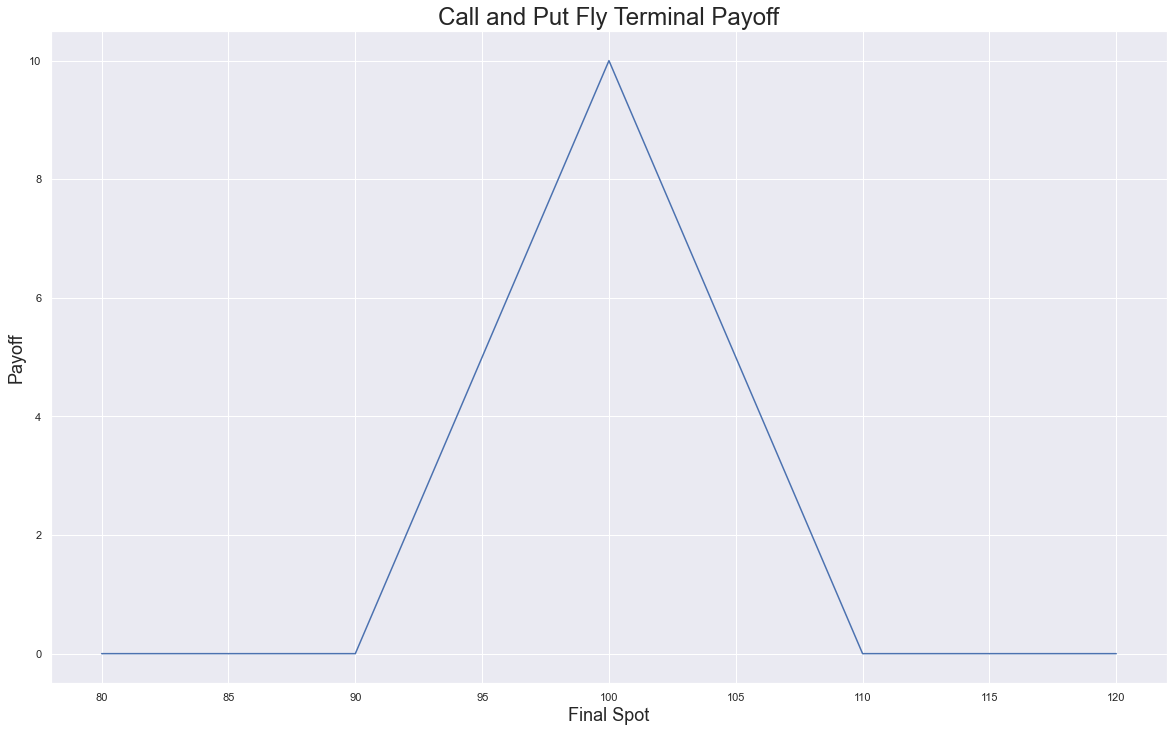

In [4]:
# usual suspects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings

# some config
%config Completer.use_jedi = False
warnings.filterwarnings('ignore')
sns.set() 

# define some example strikes
low_stk = 90
mid_stk = 100
high_stk = 110
# define a series of spots to compute terminal payoffs at
spots = np.linspace(80, 120, 41)

# create option p[ayoffs
low_call = np.array([max(0, x - low_stk) for x in spots])
mid_call = np.array([max(0, x - mid_stk) for x in spots])
high_call = np.array([max(0, x - high_stk) for x in spots])
# combine
fly = low_call - 2 * mid_call + high_call

# plot and label
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(spots, fly)
ax.set_title('Call and Put Fly Terminal Payoff', fontsize=24)
ax.set_xlabel('Final Spot', fontsize=18)
ax.set_ylabel('Payoff', fontsize=18);

So anywhere between the low and high strikes we would have a positive terminal payoff of this strategy. In particular, at the middle strike we get a payoff of `10` - because we chose strikes that were `10` apart. Now imagine if we have a full list of strikes that are `1` apart. We could create a whole set of these flys where we chose a different middle strike each time. Because the strikes are `1` apart then if we end up at the middle strike we would make `1` (just like in the above we make `10`). In other words, we can use tradable instruments to create strategies that at every spot price (if we assume that spot is an integer and can only be e.g. `99`, `100` and not `99.5`) pays out `1`.

The idea is the following: we can use the prices of these tradable instruments to figure out the prices of these call and put fly strategies. If a given fly costs `0.1` then we can _imply_ from this that the probabilitiy of the stock price finishing at the middle strike of that fly (and so pay out `1`) is `10%`. This is because if it happened more than that then we could just buy the fly for `0.1` and we would make `1` more than `10%` of the time and so overall make money.

## Can we use some real market data?

Yeah as fun as the theoretical examples are it's always really nice to see things playing out in the real world. The following is data for a full set of SPX options that I got from the CBOE [here](https://www.cboe.com/delayed_quotes/spx/quote_table). Given it's March 2022 I've selected Jun 2022 but you could grab your favourite expiry (mine used to be Dec22) as long as it has fairly liquid options - this is because we want fairly narrow bid/ask spreads so we don't end up with too much arbitrage in the tails from the implied mid price waggling around.

In [5]:
# read in options data
df_spx = pd.read_csv('spx_quotedata.csv', skiprows=3)
# get only 3rd Fri options (not month end options)
df_spx = df_spx[df_spx['Expiration Date'].str.contains('Fri')]
# only get the columns we want and rename
df_spx = df_spx[['Expiration Date', 'Strike', 'Calls',  'Bid', 'Ask', 'IV', 'Delta', 'Puts', 'Bid.1', 'Ask.1', 'IV.1', 'Delta.1']]
df_spx.columns = ['Expiration Date', 'Strike', 'Calls',  'Bid_C', 'Ask_C', 'IV_C', 'Delta_C', 'Puts', 'Bid_P', 'Ask_P', 'IV_P', 'Delta_P']
# define put and call dictionaries
puts = df_spx[['Strike', 'Bid_P', 'Ask_P']].set_index('Strike').mean(axis=1).to_dict()
calls = df_spx[['Strike', 'Bid_C', 'Ask_C']].set_index('Strike').mean(axis=1).to_dict()

df_spx.head()

,Expiration Date,Strike,Calls,Bid_C,Ask_C,IV_C,Delta_C,Puts,Bid_P,Ask_P,IV_P,Delta_P
395,Fri Jun 17 2022,200.0,SPXW220617C00200000,4273.9,4291.8,3.3106,0.9962,SPXW220617P00200000,0.0,0.10,1.8550,0.0000
396,Fri Jun 17 2022,400.0,SPXW220617C00400000,4074.2,4092.2,2.4734,0.9959,SPXW220617P00400000,0.0,0.15,1.4690,-0.0001
397,Fri Jun 17 2022,600.0,SPXW220617C00600000,3874.5,3892.6,2.0237,0.9958,SPXW220617P00600000,0.0,0.20,1.2445,-0.0001
398,Fri Jun 17 2022,800.0,SPXW220617C00800000,3674.9,3693.1,1.7202,0.9958,SPXW220617P00800000,0.1,0.30,1.1231,-0.0003
399,Fri Jun 17 2022,900.0,SPXW220617C00900000,3575.2,3593.3,1.5992,0.9957,SPXW220617P00900000,0.2,0.40,1.0816,-0.0004


So we have a table with strikes and the associated bids and asks for a load of calls and puts. Great. Now let's do exactly what we said we were going to do - create a load of call and put flys. I've chosen to go with a strike increment of `50` across the board but you could do something fancy like:
 - use `200` in the extreme tails
 - use `100` as the chain becomes more liquid
 - keep decreasing the increment until we end up in the middle of the chain where strikes differ  by only `5`

Again, using `50` works and as always simplicity is best unless we actually need a bit of cleverness to solve the problem at hand.

In [15]:
# define available strikes in increments
stk_increm = 50
max_stk = max([x for x in puts.keys() if x%stk_increm == 0])
min_stk = min([x for x in puts.keys() if x%stk_increm == 0])
strikes = np.linspace(min_stk, max_stk, int((max_stk - min_stk) / stk_increm)+1)

stks = []
put_flys = []
call_flys = []

# for each strike
for s in strikes:
    # if it, strike above and below are all in data
    if s in puts.keys() and (s - stk_increm) in puts.keys() and (s + stk_increm) in puts.keys():
        # then compute fly prices
        put_fly = puts[s - stk_increm] - 2 * puts[s] + puts[s + stk_increm]
        call_fly = calls[s - stk_increm] - 2 * calls[s] + calls[s + stk_increm]
    
        stks.append(s)
        put_flys.append(put_fly)
        call_flys.append(call_fly)

df_flys = pd.DataFrame({'strike': stks, 'put_fly': put_flys, 'call_fly': call_flys})

df_flys[60:].head()

,strike,put_fly,call_fly
60,4450.0,2.10,1.95
61,4500.0,2.25,2.35
62,4550.0,2.85,2.75
63,4600.0,3.30,3.40
64,4650.0,3.65,3.65


So we've computed our flys and I've printed out the table around where the current spot price is. As we can see the call and put flys are giving fairly similar prices with variation given due to the variable spreads for the options due to delta sensitivity and demand/supply. We can then plot both the series of call flys and the series of put flys. As we've used a strike increment of `50` this means that our flys will pay out `50` if we end up at the middle strike. To normalise this back to a 'tradable instrument' that pays out `1` we can just divide by `50`. We could also think of this as buying `0.02` of the strategy instead of `1` - whatever works for you. That gives us the following:

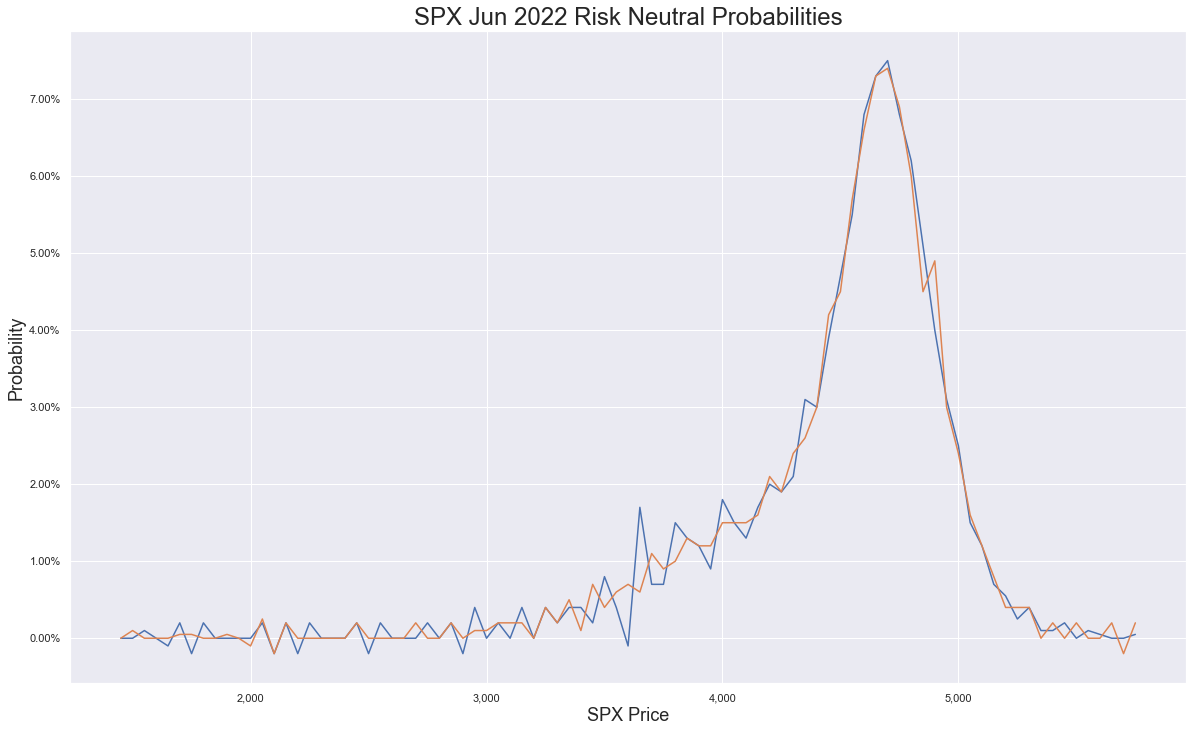

In [22]:
# plot
fig, ax = plt.subplots(figsize=(20,12)) 
ax.plot(df_flys['strike'], df_flys['call_fly'] / stk_increm)
ax.plot(df_flys['strike'], df_flys['put_fly'] / stk_increm)
# label
ax.set_title('SPX Jun 2022 Risk Neutral Probabilities', fontsize=24)
ax.set_xlabel('SPX Price', fontsize=18)
ax.set_ylabel('Probability', fontsize=18)
# format ticks
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()]);

Now that looks like a probability distribution to me!!! We can further check this by checking to see if the probabilities that we generated satisfy a basic characteristic of probability distributions - that the probabilities sum to `1`.

In [20]:
print('Sum of the call fly probabilities is: {:.2%}'.format(df_flys['call_fly'].sum() / stk_increm))
print('Sum of the put fly probabilities is: {:.2%}'.format(df_flys['put_fly'].sum() / stk_increm))

Sum of the call fly probabilities is: 99.50%
Sum of the put fly probabilities is: 99.60%


So we're not quite bang on due to:
 - not covering the full spectrum of spot (just what we had listed data for in the increments we specified)
 - maybe some bid/ask spread problems

but that looks pretty good to me.

## Recap

Hopefully by now you're on board with the idea that the overly quant-y phrase 'risk neutral measure' is nothing more than an implied probability distribution.

Implied from where? Implied from observable prices of tradable instruments which, if we needed to, we could trade to hedge ourselves if we started making prices based on that implied probability distribution. If we did that, we'd have no risk hence generating the 'risk neutral' in the term risk neutral probabilities.